## Observations and Insights 

Observation #1: Capomulin and Ramicane seem to be fairly viable treament options. Their average tumor volumes with treament are relatively low compared to other drugs, and seem to have less variance in their results than some of the other regimens. 

Observation #2: When running analysis on "time points", we need to be careful in how we interpret the data. Some drgus show an increase in tumor volume over time, while a select few show decreases. When examining "final tumor volume" in some of our comparative analyses, this is sometimes difficult to tell. Subsequently, the maximum tumor volume is not always the final tumor volume, although in most cases in the data, it is. 

Observation #3: In this exercise we plotted (in a pie chart) the distribution of sex amongst the mice tested. While this is great information when supplementing other findings, it does not tell us much in a pie chart. A better use of "sex" data, would have been to do this same distrubtion and see if sex seem to be correlated with response by treatment type. I would have replaced the pie chart with this information, as I think it would be more insightful and allow us to glean further inference into important treatment testing decisions. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df= pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
mouse_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice in the DataFrame.
mouse_df['Mouse ID'].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
sorted_df= mouse_df.sort_values(['Mouse ID' , 'Timepoint'])



In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_rows= sorted_df[sorted_df.duplicated(['Mouse ID', 'Timepoint'])]
print(duplicate_rows)

#cleaned= sorted_df.drop_duplicates(['Mouse ID',"Timepoint"])
cleaned= sorted_df[sorted_df["Mouse ID"]!= "g989"]                      
#cleaned.loc[cleaned["Mouse ID"]== "g989"]

#cleaned.drop('909', axis=index)
#use an iloc but we want to drop the entire mouse

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [5]:
# Checking the number of mice in the clean DataFrame.
cleaned["Mouse ID"].nunique()


248

## Summary Statistics

In [46]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
micegroup= cleaned.groupby(["Drug Regimen"])["Tumor Volume (mm3)"]

micemean=micegroup.mean()
micemed= micegroup.median()
micevar= micegroup.var()
micestadev= micegroup.std()
micesem= micegroup.sem()

summary= pd.merge(micemean, micemed, how='outer', on='Drug Regimen')


summary= pd.merge(summary, micevar, how='outer', on='Drug Regimen')

summary= summary.rename(columns={"Tumor Volume (mm3)_x": "Mean", "Tumor Volume (mm3)_y": "Median", "Tumor Volume (mm3)": "Variance"})

summary= pd.merge(summary, micestadev, how='outer', on='Drug Regimen')

summary= pd.merge(summary, micesem, how='outer', on= "Drug Regimen")
summary
summary=summary.rename(columns= {'Tumor Volume (mm3)_x': 'Standard Deviation', "Tumor Volume (mm3)_y": "SEM"})


#formatting
summary['Mean'] = summary['Mean'].map('{:,.2f}'.format)
summary['Median'] = summary['Median'].map('{:,.2f}'.format)
summary['Variance'] = summary['Variance'].map('{:,.2f}'.format)
summary['Standard Deviation'] = summary['Standard Deviation'].map('{:,.2f}'.format)
summary['SEM'] = summary['SEM'].map('{:,.2f}'.format)
summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar Plots

Text(0, 0.5, 'Total Data Points')

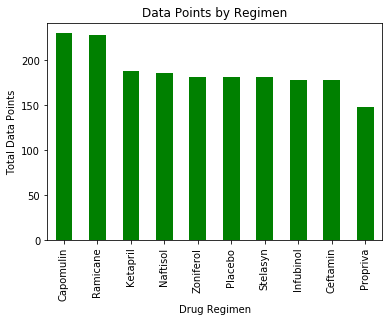

In [8]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
mice_drugs= cleaned["Drug Regimen"].value_counts()

mice_drugs.plot(kind="bar", color="g", title= "Data Points by Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Data Points")


Text(0, 0.5, 'Number of Trials')

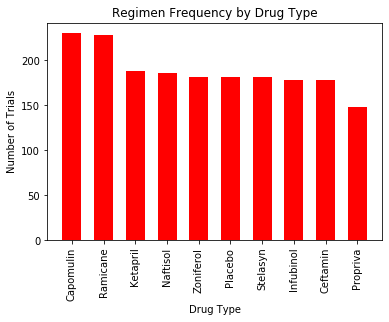

In [9]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
mice_drugs

drugname=mice_drugs.keys()

drugamount=[mice_drugs[0], mice_drugs[1], mice_drugs[2], mice_drugs[3], mice_drugs[4], mice_drugs[5], mice_drugs[6],
            mice_drugs[7], mice_drugs[8], mice_drugs[9]]

ticks= [x for x in drugname]

plt.bar(drugname, drugamount, color='red', width= 0.6 )
plt.xticks (ticks, rotation = 'vertical')
plt.title("Regimen Frequency by Drug Type")
plt.xlabel("Drug Type")
plt.ylabel("Number of Trials")


## Pie Plots

Index(['Male', 'Female'], dtype='object')

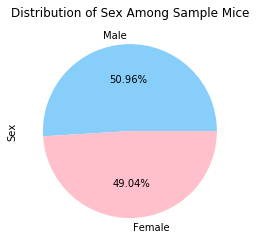

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas #Ask Tutor


colors= ['lightskyblue', 'pink']

#gender_df.plot(kind= 'pie', colors = colors, autopct='%1.1f%%')
mousepie = cleaned["Sex"].value_counts()
mousepie.plot(kind='pie',colors= colors, autopct= '%1.2f%%', title= "Distribution of Sex Among Sample Mice")
mousepie.index

Text(0.5, 1.0, 'Distribution of Sex Among Sample Mice')

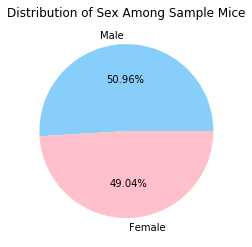

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels= mousepie.index
plt.pie(mousepie, colors= colors,labels=labels, autopct= '%1.2f%%')
plt.title("Distribution of Sex Among Sample Mice")

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
 
max_df = cleaned.groupby("Mouse ID").nth(-1)
max_df.reset_index()
#Infubinol
infubinol= max_df.loc[max_df["Drug Regimen"]== 'Infubinol']['Tumor Volume (mm3)']
infu_quartile= infubinol.quantile([.25,.50,.75])
infu_lower=infu_quartile[0.25]
infu_upper= infu_quartile[0.75]
infu_iqr= infu_upper - infu_lower
infu_lwrbound= infu_lower - 1.5*infu_iqr
infu_uprbound= infu_upper + 1.5*infu_iqr

outlier_infu= infubinol.loc[(infubinol < infu_lwrbound)|(infubinol > infu_uprbound)]


#Capomulin
capomulin= max_df.loc[max_df["Drug Regimen"]== 'Capomulin']['Tumor Volume (mm3)']
capo_quartile= capomulin.quantile([.25,.50,.75])
capo_lower=capo_quartile[0.25]
capo_upper= capo_quartile[0.75]
capo_iqr= capo_upper - capo_lower
capo_lwrbound= capo_lower - 1.5*capo_iqr
capo_uprbound= capo_upper + 1.5*capo_iqr

outlier_capo= capomulin.loc[(capomulin < capo_lwrbound)|(capomulin > capo_uprbound)]
#Ramicane
ramicane= max_df.loc[max_df["Drug Regimen"]== 'Ramicane']['Tumor Volume (mm3)']
rami_quartile= ramicane.quantile([.25,.50,.75])
rami_lower=rami_quartile[0.25]
rami_upper= rami_quartile[0.75]
rami_iqr= rami_upper - rami_lower
rami_lwrbound= rami_lower - 1.5*rami_iqr
rami_uprbound= rami_upper + 1.5*rami_iqr

outlier_rami= ramicane.loc[(ramicane < rami_lwrbound)|(ramicane > rami_uprbound)]

#Ceftamin
ceftamin= max_df.loc[max_df["Drug Regimen"]== 'Ceftamin']['Tumor Volume (mm3)']
ceft_quartile= ceftamin.quantile([.25,.50,.75])
ceft_lower=ceft_quartile[0.25]
ceft_upper= ceft_quartile[0.75]
ceft_iqr= ceft_upper - ceft_lower
ceft_lwrbound= ceft_lower - 1.5*ceft_iqr
ceft_uprbound= ceft_upper + 1.5*ceft_iqr

outlier_ceft= ceftamin.loc[(ceftamin < ceft_lwrbound)|(ceftamin > ceft_uprbound)]

if outlier_infu.empty:
    print("There are no outliers for the Infubinol treatment regimen")
else:
    print(f'The outliers for Infubinol are {outlier_infu}')
    
print('- - - - - - - - - - - - -')

if outlier_capo.empty:
    print("There are no outliers for the Capomulin treatment regimen")
else:
    print(f'The outliers for Capomulin are {outlier_capo}')
    
print('- - - - - - - - - - - - -')

if outlier_rami.empty:
    print("There are no outliers for the Ramicane treatment regimen.")
else:
    print(f'The outliers for Ramicane are {outlier_rami}')
    
print('- - - - - - - - - - - - -')

if outlier_ceft.empty:
    print("There are no outliers for the Ceftamin treatment regimen")
else:
    print(f'The outliers for Ceftamin are {outlier_ceft}')
    


The outliers for Infubinol are Mouse ID
c326    36.321346
Name: Tumor Volume (mm3), dtype: float64
- - - - - - - - - - - - -
There are no outliers for the Capomulin treatment regimen
- - - - - - - - - - - - -
There are no outliers for the Ramicane treatment regimen.
- - - - - - - - - - - - -
There are no outliers for the Ceftamin treatment regimen


Text(0, 0.5, 'Tumor Volume')

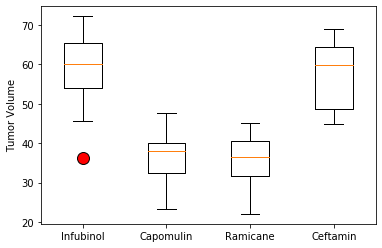

In [13]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot([infubinol, capomulin, ramicane, ceftamin], labels= ['Infubinol', 'Capomulin', 'Ramicane', 'Ceftamin'], flierprops= {'markerfacecolor': "red", 'markersize': 12})
plt.ylabel("Tumor Volume")

## Line and Scatter Plots

In [14]:
mice_cap=cleaned.loc[cleaned["Drug Regimen"]== "Capomulin"]
mice_cap

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
304,b128,Capomulin,Female,9,22,20,42.731552,0
...,...,...,...,...,...,...,...,...
120,y793,Capomulin,Male,17,17,25,38.992734,2
121,y793,Capomulin,Male,17,17,30,35.726023,2
122,y793,Capomulin,Male,17,17,35,36.327870,2
123,y793,Capomulin,Male,17,17,40,31.475411,2


Which Mouse are you looking for data on?b128
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
300     b128    Capomulin  Female           9          22          0   
301     b128    Capomulin  Female           9          22          5   
302     b128    Capomulin  Female           9          22         10   
303     b128    Capomulin  Female           9          22         15   
304     b128    Capomulin  Female           9          22         20   
..       ...          ...     ...         ...         ...        ...   
120     y793    Capomulin    Male          17          17         25   
121     y793    Capomulin    Male          17          17         30   
122     y793    Capomulin    Male          17          17         35   
123     y793    Capomulin    Male          17          17         40   
124     y793    Capomulin    Male          17          17         45   

     Tumor Volume (mm3)  Metastatic Sites  
300           45.000000                 0  
30

Text(0, 0.5, 'Tumor Volume')

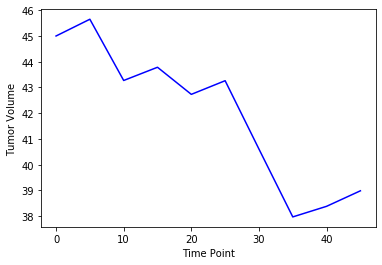

In [17]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

mouse_id= input("Which Mouse are you looking for data on?")

indmouse= mice_cap.loc[mice_cap["Mouse ID"]==mouse_id]
print(mice_cap)
plt.plot( indmouse['Timepoint'], indmouse["Tumor Volume (mm3)"], color = "blue", label = 'Tumor Volume Over Time')
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume")


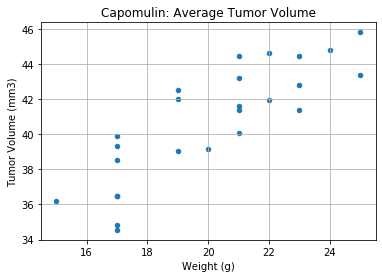

In [22]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
micescatter =mice_cap.groupby(["Mouse ID"]).mean()[["Weight (g)", "Tumor Volume (mm3)"]]
micescatter.plot(kind= 'scatter', x ='Weight (g)', y="Tumor Volume (mm3)", grid = True, title= "Capomulin: Average Tumor Volume")                                                    


## Correlation and Regression

 the correlation coefficient is 0.8419363424694717


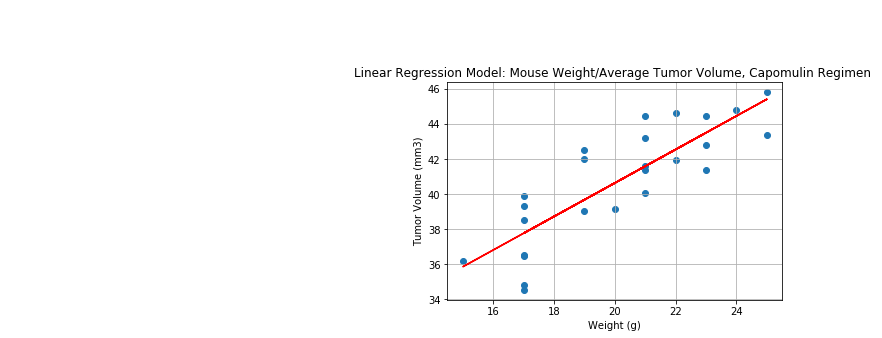

In [38]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen



#We want Capomulin, Tumor Volume, and mouse weight (averages)
capo_df= cleaned.loc[cleaned["Drug Regimen"]== 'Capomulin']

capo_corr=capo_df.groupby(["Mouse ID"]).mean()[["Tumor Volume (mm3)","Weight (g)"]]


correlation= st.pearsonr(capo_corr["Weight (g)"],capo_corr["Tumor Volume (mm3)"] )
outputcoef= correlation[0]
print(f' the correlation coefficient is {outputcoef}')
#regression

x=micescatter['Weight (g)']
y= micescatter["Tumor Volume (mm3)"] 
(slope, intercept, rvalue, pvalue, stderr) =linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x,y)
plt.plot(x,regress_values,"r")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title("Linear Regression Model: Mouse Weight/Average Tumor Volume, Capomulin Regimen ")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(b=True)


         